In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# init for importing data indonesia
df_indo=pd.read_excel('/content/drive/MyDrive/isoterm/DATA LOMBA.xlsx',sheet_name='Indonesia')
df_indo['Tahun'] = pd.to_datetime(df_indo.Tahun,format='%Y')
df_indo['Tahun'] = pd.DatetimeIndex(df_indo.Tahun)
df_indo.index = df_indo.Tahun
df_indo.drop('Tahun',axis=1,inplace=True)
df_indo

,P (Populasi),A (GDP Perkapita),T (konstan),Tapak ekologi Konsumsi Perkapita,Impact dihampiri tapak ekologi kali populasi
Tahun,,,,,
1998-01-01,205724592,464,1,1.321492,271863363.0
1999-01-01,208615169,671,1,1.354625,282595396.9
2000-01-01,211513823,780,1,1.353163,286212576.3
2001-01-01,214427417,748,1,1.332925,285815561.5
2002-01-01,217357793,900,1,1.351622,293785599.2
2003-01-01,220309469,1066,1,1.382219,304515889.2
2004-01-01,223285676,1150,1,1.426937,318614571.7
2005-01-01,226289470,1263,1,1.378521,311944811.8
2006-01-01,229318262,1590,1,1.362624,312474539.0


Data df_indo tidak memiliki missing values.

Semua data point dari setiap kolomnya memiliki nilai integer atau float

### Analisis Abil : 


1.  Analisis Deret Waktu untuk GDP ,Populasi , dan Tapak Ekologi di Indonesia

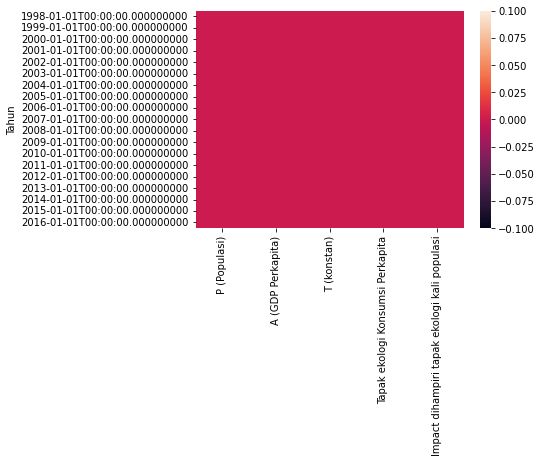

In [ ]:
sns.heatmap(df_indo.isna())

In [ ]:
df_indo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19 entries, 1998-01-01 to 2016-01-01
Data columns (total 5 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   P (Populasi)                                  19 non-null     int64  
 1   A (GDP Perkapita)                             19 non-null     int64  
 2   T (konstan)                                   19 non-null     int64  
 3   Tapak ekologi Konsumsi Perkapita              19 non-null     float64
 4   Impact dihampiri tapak ekologi kali populasi  19 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 912.0 bytes


In [ ]:
# Import buat analisis lanjut
from statsmodels.tsa.filters.hp_filter import hpfilter  #The Hodrick-Prescott (HP) filter refers to a data-smoothing technique
from statsmodels.tsa.seasonal import seasonal_decompose # ETS (Error, Trend, Seasonal)

#### Populasi

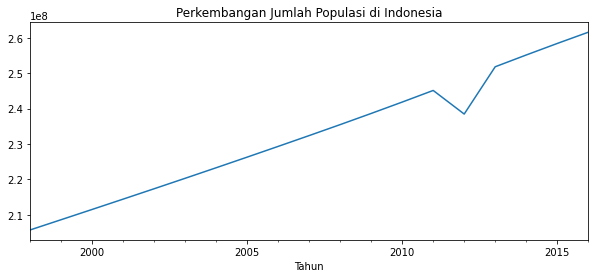

In [ ]:
# Plotting P (Populasti)
df_indo.iloc[:,0].plot(kind='line', title='Perkembangan Jumlah Populasi di Indonesia',figsize=(10,4))

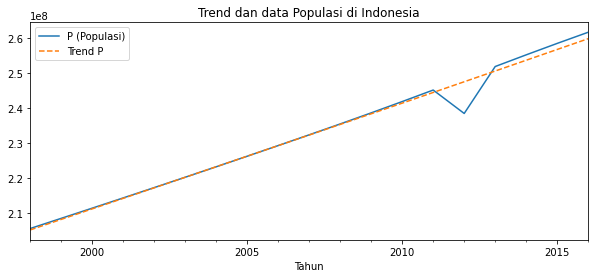

In [ ]:
pop_cycle,pop_trend = hpfilter(df_indo.iloc[:,0])
df_indo['Trend P'] = pop_trend
df_indo['P (Populasi)'].plot(figsize=(10,4))
df_indo['Trend P'].plot(figsize=(10,4),style='--')
plt.title('Trend dan data Populasi di Indonesia')
plt.legend()

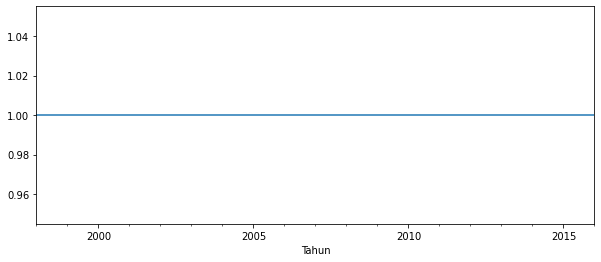

In [ ]:
result_pop = seasonal_decompose(df_indo['P (Populasi)'],model='multiplicative')
result_pop.seasonal.plot(figsize=(10,4))

#### GDP

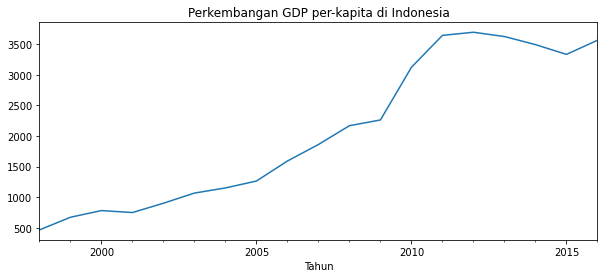

In [ ]:
# Plotting A (GDP per-Kapita)
df_indo.iloc[:,1].plot(kind='line', title='Perkembangan GDP per-kapita di Indonesia',figsize=(10,4))

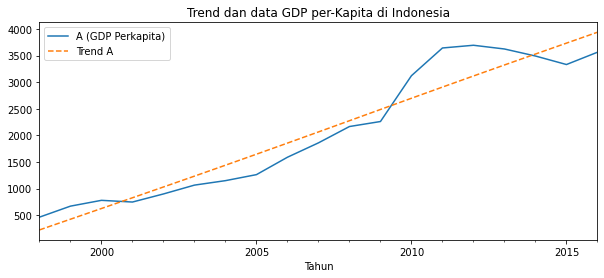

In [ ]:
gdp_cycle,gdp_trend = hpfilter(df_indo.iloc[:,1])
df_indo['Trend A'] = gdp_trend
df_indo['A (GDP Perkapita)'].plot(figsize=(10,4))
df_indo['Trend A'].plot(figsize=(10,4),style='--')
plt.title('Trend dan data GDP per-Kapita di Indonesia')
plt.legend()

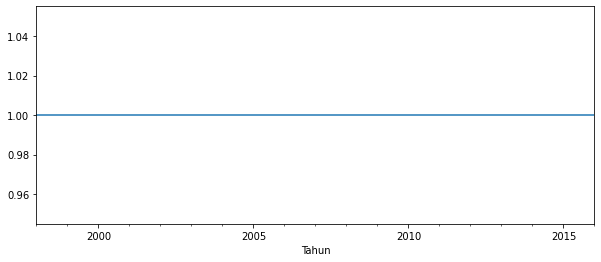

In [ ]:
result_gdp = seasonal_decompose(df_indo['A (GDP Perkapita)'] ,model='multiplicative')
result_gdp.seasonal.plot(figsize=(10,4))

#### Tapa Ekologi

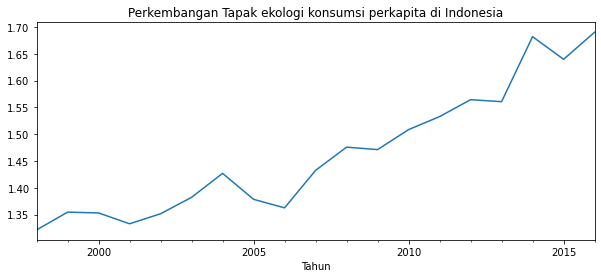

In [ ]:
# Plotting Tapak ekologi konsumsi perkapita
df_indo.iloc[:,3].plot(kind='line', title='Perkembangan Tapak ekologi konsumsi perkapita di Indonesia',figsize=(10,4))

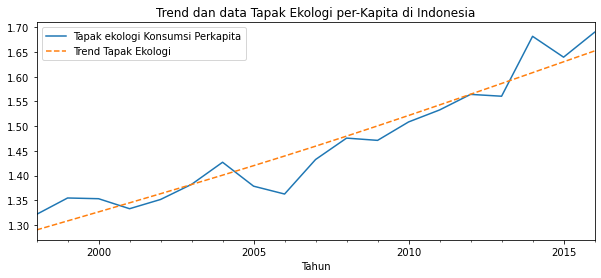

In [ ]:
tapak_cycle,tapak_trend = hpfilter(df_indo.iloc[:,3])
df_indo['Trend Tapak Ekologi'] = tapak_trend
df_indo['Tapak ekologi Konsumsi Perkapita'].plot(figsize=(10,4))
df_indo['Trend Tapak Ekologi'].plot(figsize=(10,4),style='--')
plt.title('Trend dan data Tapak Ekologi per-Kapita di Indonesia')
plt.legend()

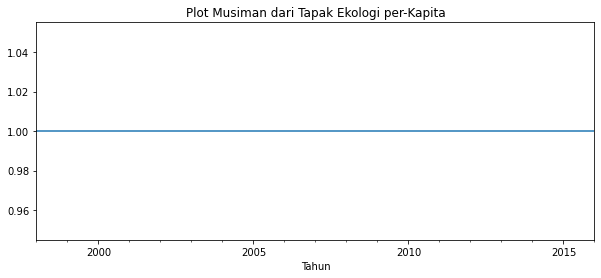

In [145]:
result_tapak = seasonal_decompose(df_indo['Tapak ekologi Konsumsi Perkapita'],model='multiplicative')
result_tapak.seasonal.plot(figsize=(10,4),title='Plot Musiman dari Tapak Ekologi per-Kapita')

2. Uji ACF dan PACF

In [154]:
# importing
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

[ 1.          0.81713858  0.65411491  0.49437261  0.34025042  0.2548296
  0.12385741  0.0041373  -0.10272506 -0.1951414  -0.27147837 -0.32995556
 -0.36862922 -0.38549166 -0.37849334 -0.40148278 -0.34637297 -0.26198157
 -0.1469489 ]


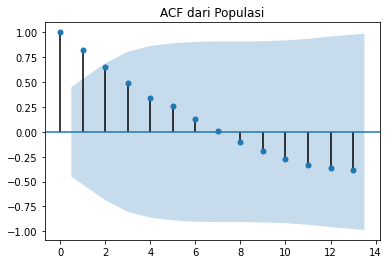

In [161]:
# Populasi 
plot_acf(df_indo.iloc[:,0]);
plt.title('ACF dari Populasi')
print(acf(df_indo.iloc[:,0]))

[ 1.          0.8810143   0.75569749  0.6086828   0.43543122  0.25178915
  0.06791567 -0.09618273 -0.21308036 -0.31564259 -0.38932815 -0.43457156
 -0.46385167 -0.43808272 -0.37691414 -0.30379869 -0.22444844 -0.15457009
 -0.09005947]


Text(0.5, 1.0, 'ACF dari GDP per-Kapita')

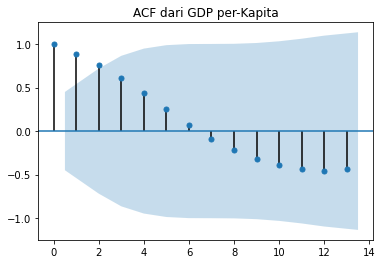

In [162]:
# GDP 
print(acf(df_indo.iloc[:,1]))
plot_acf(df_indo.iloc[:,1]);
plt.title('ACF dari GDP per-Kapita')

[ 1.          0.79046533  0.66115398  0.47195396  0.36192074  0.20637926
  0.08296941 -0.01265956 -0.12416427 -0.25900291 -0.31789922 -0.31634288
 -0.33081528 -0.38297924 -0.37978089 -0.33794507 -0.29366419 -0.19398369
 -0.12560547]


Text(0.5, 1.0, 'ACF dari Tapak Ekologi')

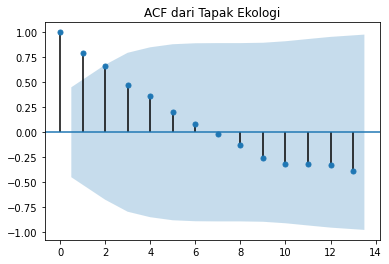

In [163]:
# Tapak Ekoogi 
print(acf(df_indo.iloc[:,3]))
plot_acf(df_indo.iloc[:,3]);
plt.title('ACF dari Tapak Ekologi')